Check the geometry of LSLGA galaxies derived from ellipse-fitting against the original geometry from Hyperleda.

In [1]:
import os, glob
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import vstack, Table, hstack

In [2]:
import seaborn as sns
sns.set(context='talk', style='ticks', font_scale=1.0)
%matplotlib inline

In [4]:
lslgaver = b'L6'
lslgafile = '/global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-model-v6.0.fits'
#lslgafile = '/global/project/projectdirs/cosmo/staging/largegalaxies/v6.0/LSLGA-model-v6.0.fits'
#lslgafile = os.getenv('LARGEGALAXIES_CAT')
lslga = Table(fitsio.read(lslgafile))
plslga = lslga[lslga['REF_CAT'] == lslgaver]
print('Read {} galaxies from {}'.format(len(lslga), lslgafile))
#lslga

Read 516182 galaxies from /global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-model-v6.0.fits


In [5]:
#lslga[lslga['D25'] <= 0]

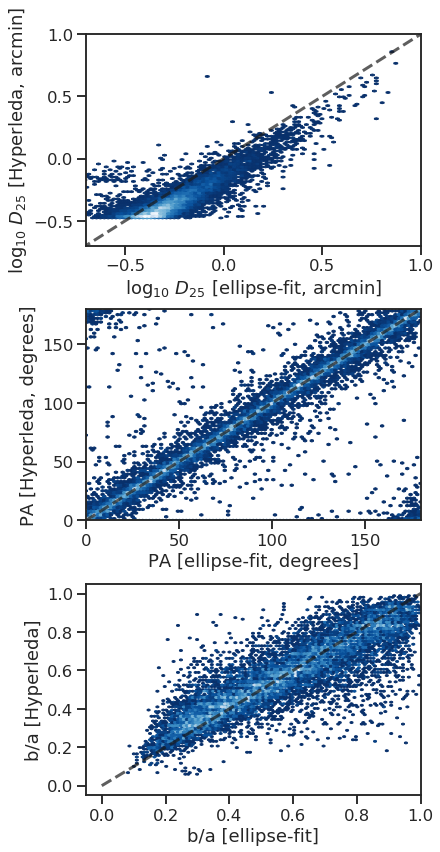

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 14))
ax1.hexbin(np.log10(plslga['D25']), np.log10(plslga['D25_ORIG']), mincnt=1,
          cmap=plt.cm.Blues_r)
#ax1.scatter(np.log10(lslga['D25']), np.log10(lslga['D25_ORIG']), s=15)
ax1.set_xlim(-0.7, 1)
ax1.set_ylim(-0.7, 1)
ax1.plot([-1, 1], [-1, 1], color='k', ls='--', lw=3, alpha=0.7)
ax1.set_xlabel(r'$\log_{10}\ D_{25}$ [ellipse-fit, arcmin]')
ax1.set_ylabel(r'$\log_{10}\ D_{25}$ [Hyperleda, arcmin]')

ax2.hexbin(plslga['PA'], plslga['PA_ORIG'], mincnt=1,
           cmap=plt.cm.Blues_r)
ax2.set_xlabel('PA [ellipse-fit, degrees]')
ax2.set_ylabel('PA [Hyperleda, degrees]')
ax2.plot([0, 180], [0, 180], color='k', ls='--', lw=3, alpha=0.7)

ax3.hexbin(plslga['BA'], plslga['BA_ORIG'], mincnt=1,
           cmap=plt.cm.Blues_r)
ax3.set_xlabel('b/a [ellipse-fit]')
ax3.set_ylabel('b/a [Hyperleda]')
ax3.plot([0, 1], [0, 1], color='k', ls='--', lw=3, alpha=0.7)

fig.subplots_adjust(hspace=0.3)

In [7]:
lslga[(lslga['LSLGA_ID'] > 0) * (lslga['D25'] == 0)]

LSLGA_ID,GALAXY,PGC,RA,DEC,TYPE,BAR,RING,MULTIPLE,COMPACTNESS,T,PA,D25,BA,DIAM_REF,Z,SB_D25,MAG,MAG_REF,WISE_RA,WISE_DEC,CNTR,W1MPRO,W1SIGMPRO,W2MPRO,W2SIGMPRO,W3MPRO,W3SIGMPRO,W4MPRO,W4SIGMPRO,RCHI2,CC_FLAGS,EXT_FLG,PH_QUAL,XSCPROX,W1RSEMI,W1BA,W1PA,W1GMAG,W1GERR,W2GMAG,W2GERR,W3GMAG,W3GERR,W4GMAG,W4GERR,IN_ALLWISE,IN_DESI_NORTH,IN_DESI_NORTH_GRZ,IN_DESI_SOUTH,IN_DESI_SOUTH_GRZ,IN_DESI,IN_DESI_GRZ,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,NEAR_BRIGHTSTAR,LSLGA_RA,LSLGA_DEC,MORPHTYPE,D25_ORIG,PA_ORIG,BA_ORIG,RELEASE,BRICKID,BRICKNAME,OBJID,BRICK_PRIMARY,BRIGHTBLOB,MASKBITS,ITERATIVE,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_POINTSOURCE,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_FRACFLUX_W1 [15],LC_FRACFLUX_W2 [15],LC_RCHISQ_W1 [15],LC_RCHISQ_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],LC_EPOCH_INDEX_W1 [15],LC_EPOCH_INDEX_W2 [15],SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,PREBURNED,FREEZE,RADIUS_SB23,MAG_G_SB23,MAG_R_SB23,MAG_Z_SB23,RADIUS_SB24,MAG_G_SB24,MAG_R_SB24,MAG_Z_SB24,RADIUS_SB25,MAG_G_SB25,MAG_R_SB25,MAG_Z_SB25,RADIUS_SB25.5,MAG_G_SB25.5,MAG_R_SB25.5,MAG_Z_SB25.5,RADIUS_SB26,MAG_G_SB26,MAG_R_SB26,MAG_Z_SB26,MAG_G_TOT,MAG_R_TOT,MAG_Z_TOT
int64,bytes29,int64,float64,float64,bytes9,bytes3,bytes3,bytes3,bytes3,float32,float32,float32,float32,bytes3,float32,float32,float32,bytes1,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,bytes4,int32,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool,int64,bytes29,int16,bool,float64,float64,float32,bool,float64,float64,bytes9,float32,float32,float32,int16,int32,bytes19,int32,bool,int16,int16,bool,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

In [11]:
ff = Table.read('/global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-reject-v6.0.fits')
ff

NAME,RA,DEC,LSLGA_ID,D25,PA,BA
str23,float64,float64,int64,float32,float32,float32
PGC1089160,31.915563000000002,-2.5404093,44624,0.3981072,179.0,0.63095737
PGC1365237,205.68884999999997,9.4471,73834,0.38904512,35.0,0.5011872
PGC1148178,213.77019600000003,-0.24621329999999997,117558,0.45708823,105.38,0.3715352
PGC051602,216.798717,53.62396700000001,152751,0.40364543,0.0,0.9036495
PGC1292230,209.27348850000004,5.967253400000001,239202,0.35399735,19.19,0.8317638
PGC2057027,151.57805549999998,34.9447186,255451,0.7762471,102.0,0.724436
PGC2482646,216.05176500000002,54.858253500000004,408550,0.34673685,107.0,0.74131024
PGC2482655,216.05574149999998,54.85876460000001,1300978,0.33884412,128.0,0.8709636
PGC1173289,217.190877,0.7050901999999999,1362683,0.40738028,97.67,0.60255957


In [12]:
rr = Table.read('/global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-inspect-v6.0.fits')
rr

NAME,RA,DEC,LSLGA_ID,D25,PA,BA
str23,float64,float64,int64,float32,float32,float32
PGC050965,214.02195450000002,-1.260376,6129,0.62086904,172.83,0.5675446
PGC2183601,224.205969,41.5963809,13253,0.69823235,172.38,0.40926066
PGC1167205,35.657589,0.4857232,19117,0.5370318,70.11,0.22387213
PGC1943146,138.8469825,31.3520025,31072,0.41783038,148.86,0.63095737
PGC140295,214.6570965,2.045988,41649,0.64268774,76.99,0.34673685
PGC2024569,136.5774585,33.1421389,42194,0.36307806,45.5,0.66069347
PGC2239206,281.4302925,44.210889,55578,0.46773514,172.0,0.53703177
PGC2208915,281.97150000000005,42.9184,59538,0.3548134,2.0,0.691831
PGC061664,274.0392315,42.6562809,71357,1.9952621,48.5,0.27542287
